#### WORLDWIDE COVID-19 CASES REPORTED TILL DATE

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


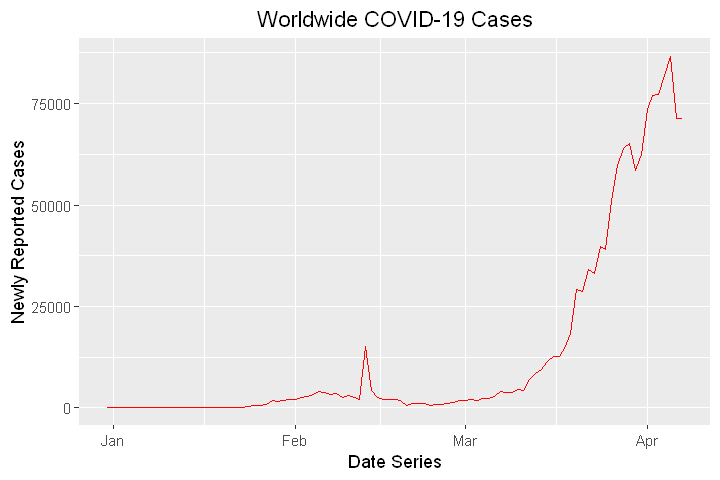

In [2]:
library("ggplot2")
library("readxl")
options(repr.plot.width=6, repr.plot.height=4)
covid<-data.frame(read_excel("C:/Users/avakk/Documents/April7COVID-19.xlsx"))
val<-paste(covid$year,"-",covid$month,"-",covid$day,sep = "")
covid$dateRep<-val
covid$dateRep<-as.Date(covid$dateRep)

total_cases_by_date<-aggregate(covid$cases,by=list(covid$dateRep),FUN=sum)
covid_report_plot<-ggplot(total_cases_by_date,aes(total_cases_by_date$Group.1,total_cases_by_date$x))+geom_line(color="red")
covid_report_plot+ggtitle("Worldwide COVID-19 Cases")+labs(y="Newly Reported Cases", x = "Date Series")+theme(plot.title = element_text(hjust = 0.5))  #time-series

##### TOP 20 COUNTRIES MOST AFFECTED BY CONFIRMED CASES

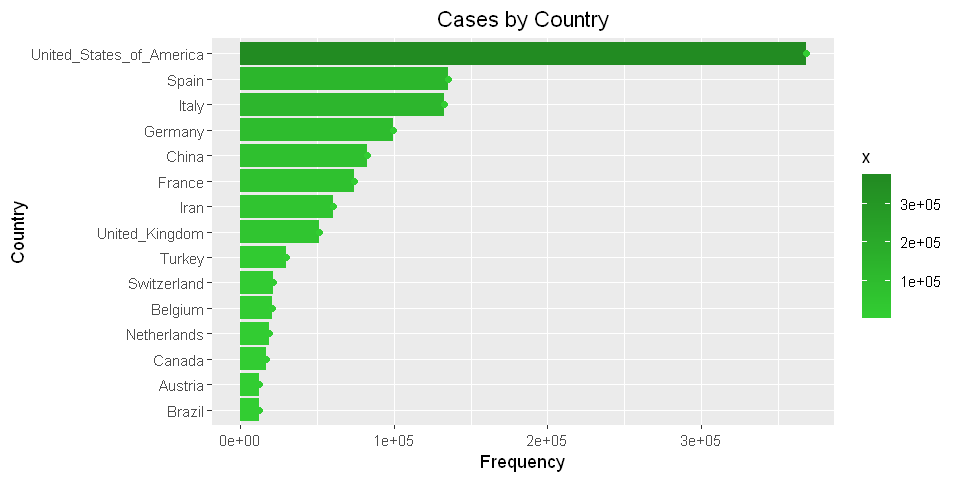

In [3]:
options(repr.plot.width=8, repr.plot.height=4)
cases_by_country<-aggregate(covid$cases,by=list(covid$countriesAndTerritories),FUN=sum)
cases_by_country<-cases_by_country[order(-cases_by_country$x),]
topcasesbycountries<-head(cases_by_country,15)
covid_cases_by_country_plot<-ggplot(topcasesbycountries,aes(y=topcasesbycountries$x,x=reorder(topcasesbycountries$Group.1,topcasesbycountries$x)))+geom_bar(stat="identity")+geom_col(aes(fill = x))+geom_point(color="limegreen") + scale_fill_gradient(low = "limegreen", high = "forestgreen")+coord_flip()
covid_cases_by_country_plot+ggtitle("Cases by Country")+labs(x="Country",y="Frequency")+theme(plot.title = element_text(hjust = 0.5))

#### TOP 20 COUNTRIES MOST AFFECTED BY DEATHS 

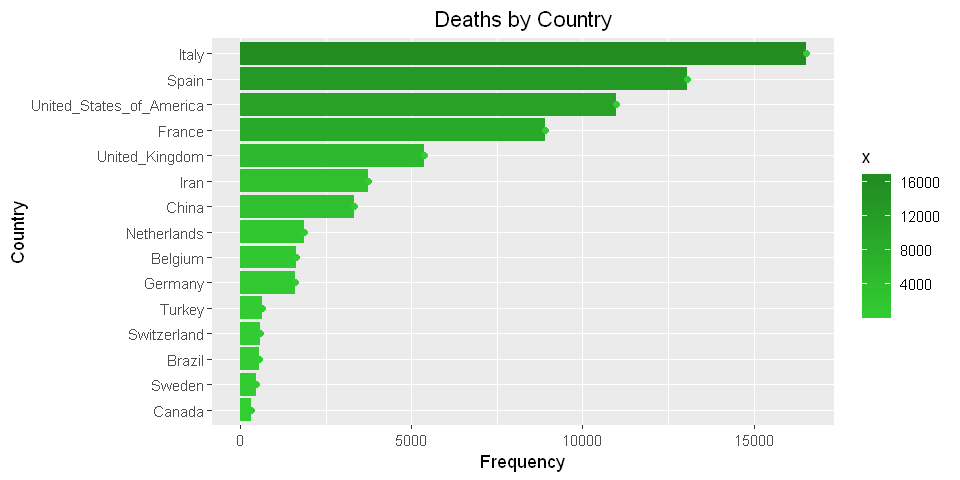

In [11]:
options(repr.plot.width=8, repr.plot.height=4)
deaths_by_country<-aggregate(covid$deaths,by=list(covid$countriesAndTerritories),FUN=sum)
deaths_by_country<-deaths_by_country[order(-deaths_by_country$x),]
topdeathsbycountries<-head(deaths_by_country,15)
covid_death_by_country_plot<-ggplot(topdeathsbycountries,aes(y=topdeathsbycountries$x,x=reorder(topdeathsbycountries$Group.1,topdeathsbycountries$x)))+geom_bar(stat="identity")+geom_col(aes(fill = x))+geom_point(color="limegreen") + scale_fill_gradient(low = "limegreen", high = "forestgreen")+coord_flip()
covid_death_by_country_plot+ggtitle("Deaths by Country")+labs(x="Country",y="Frequency")+theme(plot.title = element_text(hjust = 0.5))


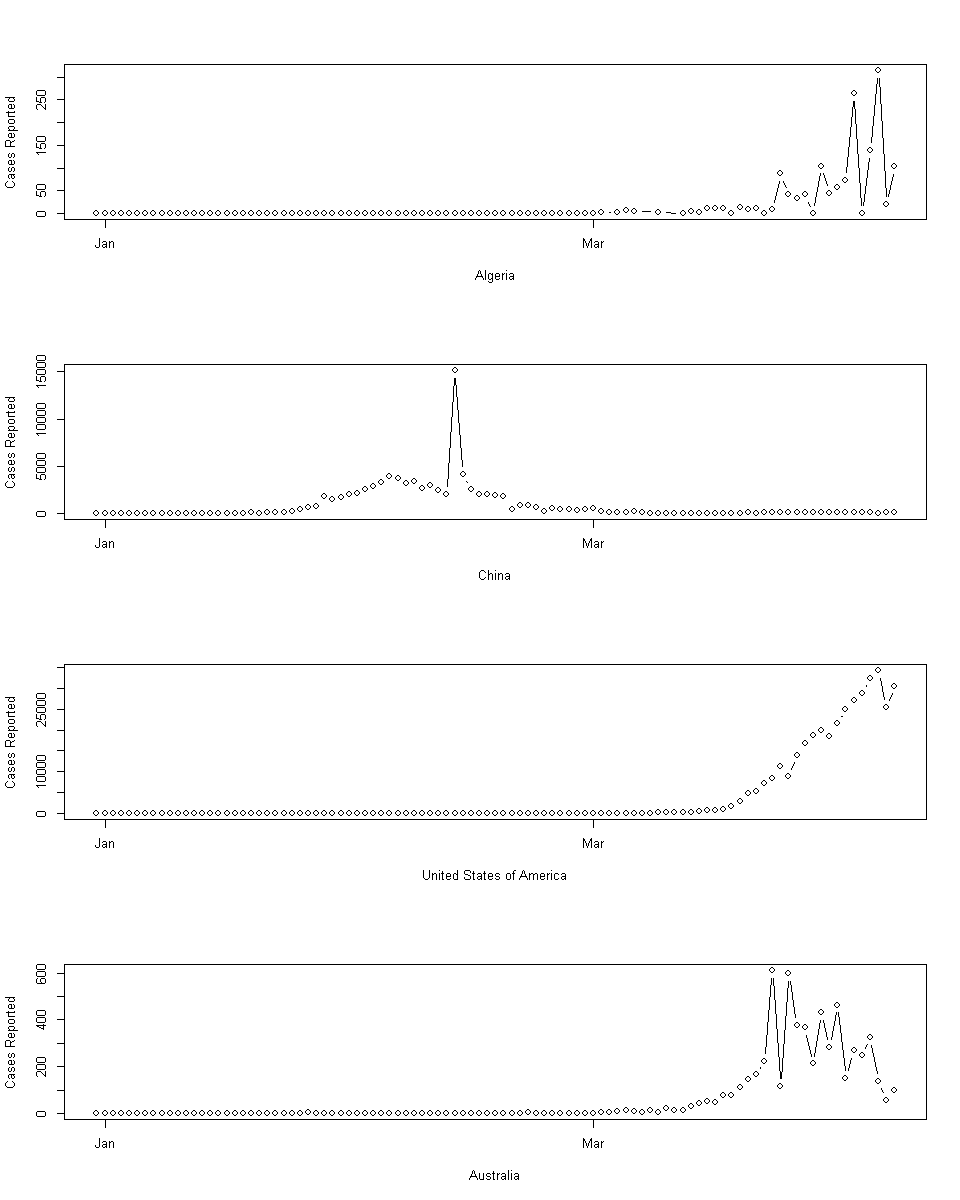

In [29]:
par(mfrow=c(4,1))
options(repr.plot.width=8, repr.plot.height=10)
covidalg<-covid[covid$countriesAndTerritories=="Algeria",]
total_cases_by_date_algeria<-aggregate(covidalg$cases,by=list(covidalg$dateRep),FUN=sum)
plot(total_cases_by_date_algeria,xlab="Algeria",ylab="Cases Reported",type="b")

covidchina<-covid[covid$countriesAndTerritories=="China",]
total_cases_by_date_china<-aggregate(covidchina$cases,by=list(covidchina$dateRep),FUN=sum)
p2<-plot(total_cases_by_date_china,xlab="China",ylab="Cases Reported",type="b")

covidusa<-covid[covid$countriesAndTerritories=="United_States_of_America",]
total_cases_by_date_usa<-aggregate(covidusa$cases,by=list(covidusa$dateRep),FUN=sum)
p3<-plot(total_cases_by_date_usa,xlab="United States of America",ylab="Cases Reported",type="b")

covidaus<-covid[covid$countriesAndTerritories=="Australia",]
total_cases_by_date_australia<-aggregate(covidaus$cases,by=list(covidaus$dateRep),FUN=sum)
p3<-plot(total_cases_by_date_australia,xlab="Australia",ylab="Cases Reported",type="b")